# UNHCR Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from IPython.display import display 

from dateutil import parser
plt.style.use('ggplot')

%matplotlib inline

# Load Data and Clean

In [2]:
%%time


seekers = pd.read_csv('asylum_seekers_monthly.csv')

# Fill missing values with consistent value
seekers = seekers.fillna(value = "")
# Replace all '*' with ''
seekers = seekers.replace(['*'], ['']) 

# Convert 'Year and Value' to numeric 
seekers['Year'] = pd.to_numeric(seekers['Year'], errors='coerce')
seekers['Value'] = pd.to_numeric(seekers['Value'], errors='coerce')

seekers.head()
# seekers.Origin.unique()

def parse_date(row):
    yyyymm = ('%s %s 01' % (row['Year'], row['Month']))
    return parser.parse(yyyymm)
   
seekers['YYYYMM'] = seekers.apply(parse_date, axis=1)

seekers.to_csv('asylum_seekers_monthly.csv')


CPU times: user 1min 4s, sys: 2.08 s, total: 1min 6s
Wall time: 1min 6s


In [3]:
seekers = pd.read_csv('asylum_seekers_monthly.csv')
seekers.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Country / territory of asylum/residence,Origin,Year,Month,Value,YYYYMM
0,0,0,0,Australia,Afghanistan,1999,January,8.0,1999-01-01
1,1,1,1,Australia,Afghanistan,1999,February,10.0,1999-02-01
2,2,2,2,Australia,Afghanistan,1999,March,25.0,1999-03-01
3,3,3,3,Australia,Afghanistan,1999,April,25.0,1999-04-01
4,4,4,4,Australia,Afghanistan,1999,May,7.0,1999-05-01


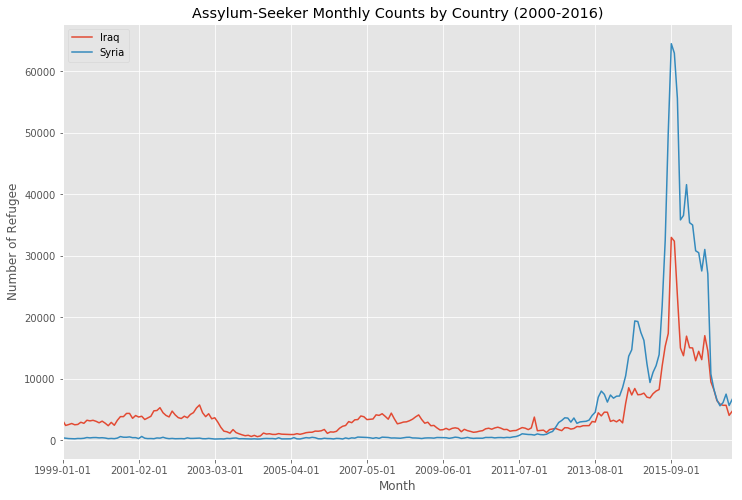

In [4]:
seekers.head()

# seekers['YYYYMM'] 

monthly = seekers[seekers['Origin'].isin(['Syrian Arab Rep.', 'Iraq'])]
monthly.set_index('YYYYMM', inplace=True)
group = monthly.groupby(['Origin', 'YYYYMM'], as_index=False)

total = monthly.groupby(['Origin', 'YYYYMM'])[['Value']].aggregate('sum')

data = {'Iraq' :[], 
        'Syrian Arab Rep.' :[]}

for index, row in total.iterrows():
    data[index[0]].append([row[0], index[1]])

# print(data['Iraq'])

df_iraq = pd.DataFrame(data['Iraq'])
df_iraq.set_index(1, inplace=True)
df_syria = pd.DataFrame(data['Syrian Arab Rep.'])
df_syria.set_index(1, inplace=True)

# df_iraq

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

df_iraq.plot(ax=ax, label='Iraq')
df_syria.plot(ax=ax, label='Syria')

plt.title("Assylum-Seeker Monthly Counts by Country (2000-2016)")
ax.set_xlabel('Month')
ax.set_ylabel('Number of Refugee')
ax.legend(['Iraq', 'Syria'])


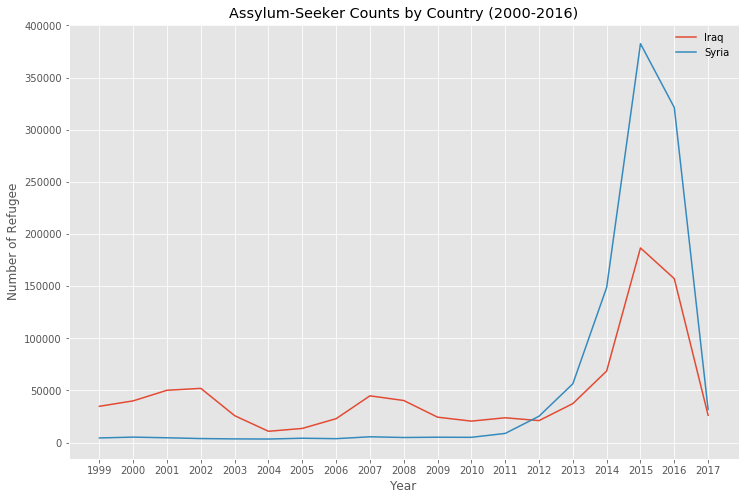

In [5]:

filter_df = seekers[seekers['Origin'].isin(['Iraq','Syrian Arab Rep.'])]
filter_df = seekers.groupby(['Origin', 'Year'])[['Value']].aggregate('sum')

iraq = filter_df.query("Origin == 'Iraq'")
syria = filter_df.query("Origin == 'Syrian Arab Rep.'")

# iraq['Year']
filter_df

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

# filter_df.plot()
plt.plot(seekers.Year.unique(), iraq['Value'], label = 'Iraq')
plt.plot(seekers.Year.unique(), syria['Value'], label = 'Syria')

plt.title("Assylum-Seeker Counts by Country (2000-2016)")
ax.set_xlabel('Year')
ax.set_ylabel('Number of Refugee')
plt.xticks(seekers.Year.unique())
ax.legend(frameon=False)

# Corelation

,value
YYYYMM,
2012-02-01,1612.0
2012-03-01,1668.0
2012-04-01,1295.0
2012-05-01,1768.0
2012-06-01,1853.0


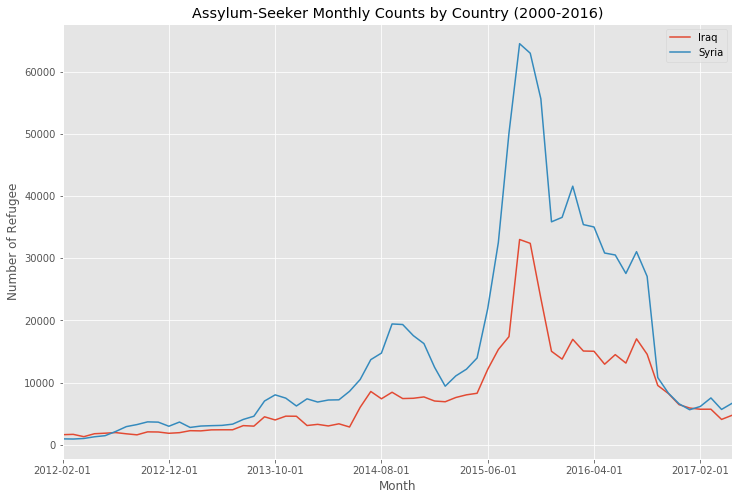

In [6]:
# seekers.head()

# seekers['YYYYMM'] 

monthly = seekers[seekers['Origin'].isin(['Syrian Arab Rep.', 'Iraq'])]
monthly.set_index('YYYYMM', inplace=True)
group = monthly.groupby(['Origin', 'YYYYMM'], as_index=False)

total = monthly.groupby(['Origin', 'YYYYMM'])[['Value']].aggregate('sum')



data = {'Iraq' :[], 
        'Syrian Arab Rep.' :[]}


for index, row in total.iterrows():
    data[index[0]].append([row[0], index[1]])

# print(data['Iraq'])

df_iraq = pd.DataFrame(data['Iraq'])
df_iraq.columns = ['value', 'YYYYMM']
df_iraq.set_index('YYYYMM', inplace=True)

df_syria = pd.DataFrame(data['Syrian Arab Rep.'])
df_syria.columns = ['value', 'YYYYMM']
df_syria.set_index('YYYYMM', inplace=True)

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

df_iraq.loc[df_iraq.index > '2012-01-01'].plot(ax=ax, label='Iraq')
df_syria.loc[df_syria.index > '2012-01-01'].plot(ax=ax, label='Syria')

plt.title("Assylum-Seeker Monthly Counts by Country (2000-2016)")
ax.set_xlabel('Month')
ax.set_ylabel('Number of Refugee')
ax.legend(['Iraq', 'Syria'])

df_iraq.head()
df_iraq.columns
# df_iraq[df_iraq['YYYYMM'] > '2012-01-01'].head()
df_iraq.loc[df_iraq.index > '2012-01-01'].head()

{'political': 3, 'misc': 2, 'violence/terrorism': 1}


0    syrian assad say syria killed damascus people ...
1    use osc copyrighted_material dissemination usa...
2    will year can people one country party make sa...
3    quot apos say the we it reuters terrorists ass...
4    baghdad iraq sunni killed bomb iraqi attacks w...
Name: topicFlat, dtype: object

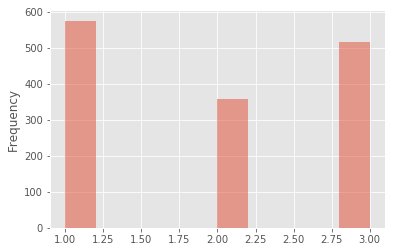

In [7]:


######################################################################

data_train = pd.read_csv('result_all_windows_labels.csv')

# Cleanup - remove no labels
data_train = data_train[data_train['label'].notnull()]
data_train = data_train[data_train.label != 'environmental']
data_train = data_train[data_train.label != 'religious']
data_train = data_train[data_train.label != 'economical']


label_cat = {'violence/terrorism' : 1, 'misc': 2, 'political': 3, 
#              'religious': 4, 'economical': 5, 'environmental': 6
            }
print(label_cat) 


def to_category(x):
    return label_cat[x]

data_train['target'] = data_train.apply(lambda row: to_category(row['label']), axis=1)

data_train['target'].plot.hist(alpha=0.5)

texts = []
# Get corpus by joining all keywords
for index, row in data_train.iloc[ :, 2:32].iterrows():
    texts.append(u' '.join(row.tolist()))
    
data_train['topicFlat'] = texts

labels = data_train['target']

# print(labels)
data_train['topicFlat'].head()

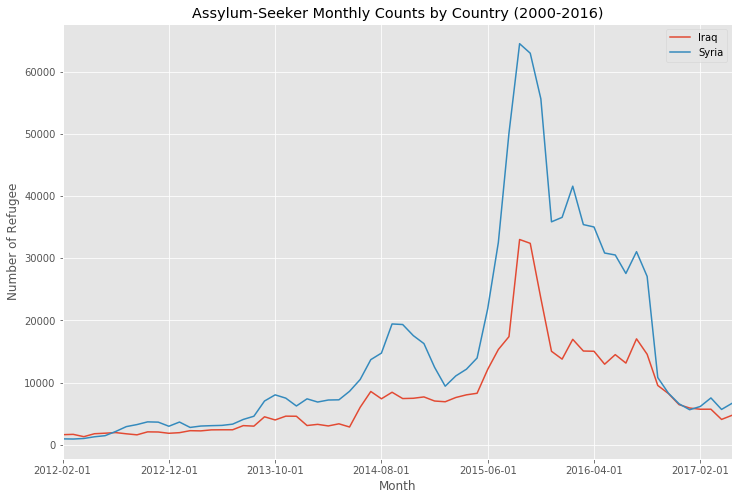

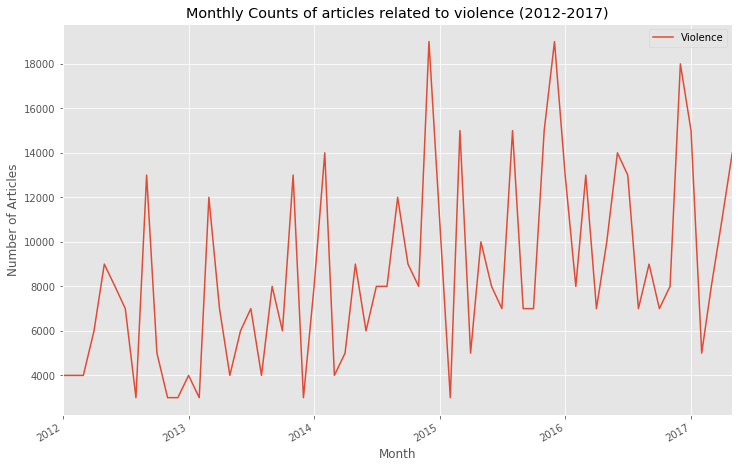

In [8]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

df_syria = df_syria.loc[(df_syria.index > '2012-01-01') & (df_syria.index < '2017-06-01')]
df_iraq = df_iraq.loc[(df_iraq.index > '2012-01-01') & (df_iraq.index < '2017-06-01')]
df_iraq.plot(ax=ax, label='Iraq')
df_syria.plot(ax=ax, label='Syria')


def parse_date(row):
    year = row[0].split('_')[0]
    month = row[0].split('_')[1]
    yyyymm = ('%s %s 01' % (year, month))
    return parser.parse(yyyymm)
   
data_train['YYYYMM'] = data_train.apply(parse_date, axis=1)

# data_train = data_train[data_train.label == 'political']
data_train = data_train[data_train.label == 'violence/terrorism']
# df = data_train.groupby(['YYYYMM', 'target']).count()



plt.title("Assylum-Seeker Monthly Counts by Country (2000-2016)")
ax.set_xlabel('Month')
ax.set_ylabel('Number of Refugee')
ax.legend(['Iraq', 'Syria', 'political'])

df = data_train.groupby(['YYYYMM']).size()
# df_syria.index

fig = plt.figure(figsize=(12,8))
ax = plt.axes()
df = df[df.index < '2017-06-01']

df = df.apply(lambda x: x * 1000)
df.plot(ax=ax)


plt.title("Monthly Counts of articles related to violence (2012-2017)")
ax.set_xlabel('Month')
ax.set_ylabel('Number of Articles')
ax.legend(['Violence'])






,iraq,syria,violence
YYYYMM,,,
2012-02-01,1612.0,943.0,4000
2012-03-01,1668.0,915.0,4000
2012-04-01,1295.0,1004.0,4000
2012-05-01,1768.0,1277.0,6000
2012-06-01,1853.0,1455.0,9000


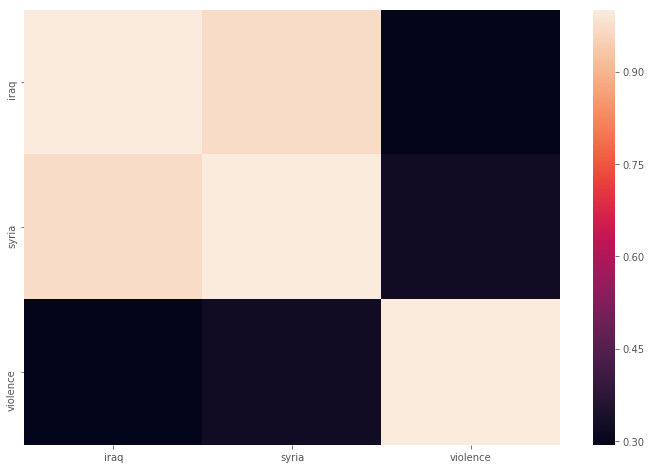

In [9]:
corre_df = pd.DataFrame({'syria': df_syria.value, 'iraq': df_iraq.value, 'violence': df.values})

df.head()
# df_syria.head()
# data_train.head()


fig = plt.figure(figsize=(12,8))
import seaborn as sns
corr = corre_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corre_df.head()